# Homework for TD 2 

Dataset : Premier League's Teams's Stats from 2006-2007 to 2017-2018

In [1]:
matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
dffoot = pd.read_csv("stats.csv", sep=",")

In [4]:
dffoot

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


In [5]:
#dffoot.info()
#dffoot.columns

#dffoot.isnull()

nb_lignes, nb_colonnes = dffoot.shape
print('Nb lignes :', nb_lignes)
print('Nb colonnes :', nb_colonnes)

Nb lignes : 240
Nb colonnes : 42


In [18]:
#dffoot.describe()
dffoot.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [7]:
dffoot['team']

0         Manchester United
1                   Chelsea
2                 Liverpool
3                   Arsenal
4         Tottenham Hotspur
               ...         
235       Huddersfield Town
236            Swansea City
237             Southampton
238              Stoke City
239    West Bromwich Albion
Name: team, Length: 240, dtype: object

In [57]:
dffoot.groupby('team').wins.sum().sort_values()[-20:]

team
Crystal Palace           60.0
Bolton Wanderers         68.0
Wigan Athletic           70.0
Blackburn Rovers         72.0
Southampton              79.0
Swansea City             82.0
Fulham                   87.0
West Bromwich Albion     93.0
Sunderland               95.0
Aston Villa             113.0
Stoke City              116.0
Newcastle United        116.0
West Ham United         127.0
Everton                 185.0
Tottenham Hotspur       228.0
Liverpool               234.0
Arsenal                 255.0
Manchester City         256.0
Chelsea                 276.0
Manchester United       290.0
Name: wins, dtype: float64

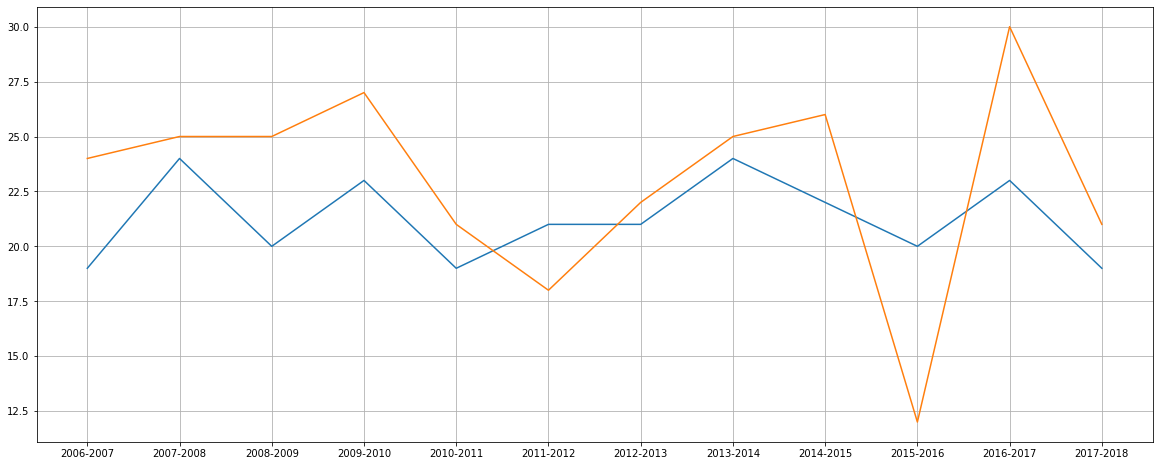

In [38]:
wins = dffoot.pivot_table('wins',index='season',columns='team',aggfunc=sum)
plt.figure(figsize=(20,8))
plt.grid()
plt.plot(wins["Arsenal"])
plt.plot(wins["Chelsea"])

Text(0.5, 1.0, "Number of Arsenal's Goals")

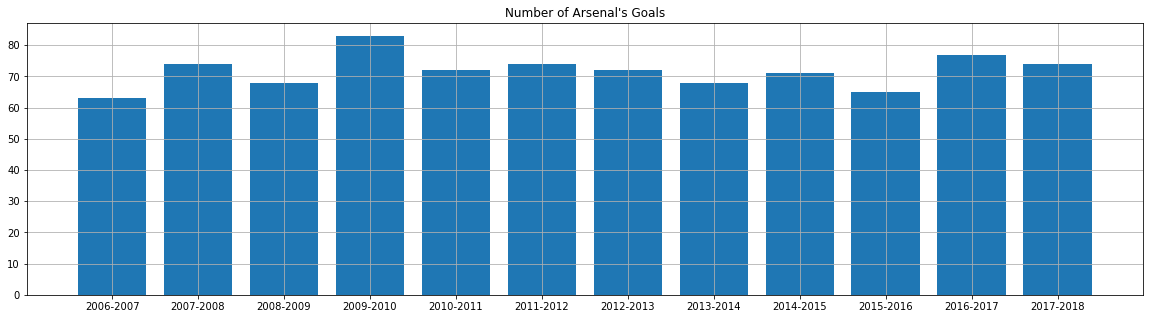

In [115]:
goal = dffoot[(dffoot.team == 'Arsenal')].groupby('season').goals.sum()
plt.figure(figsize=(20,5))
plt.grid()
plt.bar(dffoot['season'].unique(),goal)
plt.title('Number of Arsenal\'s Goals')



<AxesSubplot:title={'center':'Teams who receveid the most red cards'}, xlabel='team'>

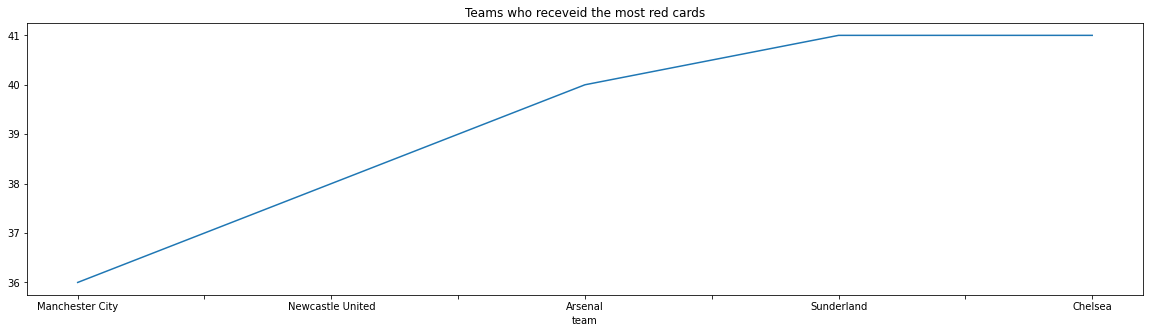

In [128]:
plt.figure(figsize=(20,5))
plt.title("Teams who receveid the most red cards")
dffoot.groupby('team').total_red_card.sum().sort_values()[-5:].plot()


Questions that we can ask :

- The 10 teams who are the most fair-play (less yellow and red cards) with a red card = 2 yellow card
- The 10 teams who shooted the most (goal + att missed)
- Arsenal's number of each Kick Off

In [16]:
#The 10 teams who are the most fair-play (less yellow and red cards) with a red card = 2 yellow card

(dffoot.groupby("team").total_yel_card.sum() + dffoot.groupby("team").total_red_card.sum()*2).sort_values()[-10:]

team
Newcastle United     707.0
Everton              735.0
Stoke City           741.0
Tottenham Hotspur    743.0
Arsenal              765.0
Sunderland           777.0
Manchester United    780.0
Chelsea              797.0
Manchester City      803.0
West Ham United      806.0
dtype: float64

In [20]:
#The 10 teams who shooted the most (goal + att missed)

(dffoot.groupby("team").total_scoring_att.sum() + dffoot.groupby("team").ontarget_scoring_att.sum()).sort_values()[-10:]

team
Aston Villa           6028.0
Newcastle United      6342.0
West Ham United       7136.0
Everton               8239.0
Manchester City       9677.0
Manchester United     9730.0
Tottenham Hotspur     9937.0
Arsenal               9991.0
Liverpool            10474.0
Chelsea              10549.0
dtype: float64

In [26]:
#Arsenal's number of each Kick Off

dffoot[dffoot.team == "Arsenal"].groupby("team").corner_taken.sum() + dffoot[dffoot.team == "Arsenal"].groupby("team").touches.sum() + dffoot[dffoot.team == "Arsenal"].groupby("team").att_pen_goal.sum() + dffoot[dffoot.team == "Arsenal"].groupby("team").att_freekick_goal.sum()

team
Arsenal    350057.0
dtype: float64